# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "../output_data/cities_weather.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityList = []
lat = []
long = []
maxTemp = []
humid = []
cloud = []
wind = []
country = []
date = []
x = 0

for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    response = requests.get(query_url)
    weatherData = response.json()
    
    try:
        cityList.append(weatherData['name'])
        print(f"Processing Record {x} | {weatherData['name']}")
        x += 1
    except:
        print('City not found. Skipping...')
    try:
        lat.append(weatherData['coord']['lat'])
    except:
        lat.append(np.nan)
    try:
        long.append(weatherData['coord']['lon'])
    except:
        long.append(np.nan)
    try:
        maxTemp.append(weatherData['main']['temp_max'])
    except:
        maxTemp.append(np.nan)
    try:
        humid.append(weatherData['main']['humidity'])
    except:
        humid.append(np.nan)
    try:
        cloud.append(weatherData['clouds']['all'])
    except:
        cloud.append(np.nan)
    try:
        wind.append(weatherData['wind']['speed'])
    except:
        wind.append(np.nan)
    try:
        country.append(weatherData['sys']['country'])
    except:
        country.append(np.nan)
    try:
        date.append(weatherData['dt'])
    except:
        date.append(np.nan)
    
    

        
        
        
        
      
        
           
          



Processing Record 0 | Rikitea
Processing Record 1 | Busselton
Processing Record 2 | Kudahuvadhoo
City not found. Skipping...
Processing Record 3 | Gubbio
City not found. Skipping...
Processing Record 4 | West Wendover
Processing Record 5 | Suntar
Processing Record 6 | New Norfolk
Processing Record 7 | Qaanaaq
Processing Record 8 | Gerāsh
Processing Record 9 | Kruisfontein
Processing Record 10 | Hobart
Processing Record 11 | Temuco
Processing Record 12 | Ponta do Sol
Processing Record 13 | Valparaíso
Processing Record 14 | Airai
Processing Record 15 | Tazovsky
Processing Record 16 | Morón
City not found. Skipping...
Processing Record 17 | Thompson
Processing Record 18 | Laguna
Processing Record 19 | Cidreira
Processing Record 20 | The Valley
City not found. Skipping...
Processing Record 21 | San Vicente
Processing Record 22 | Lompoc
Processing Record 23 | Port Lincoln
Processing Record 24 | Northam
Processing Record 25 | Puerto Ayora
Processing Record 26 | Santiago del Estero
Processing

Processing Record 222 | Sertânia
Processing Record 223 | Mampong
Processing Record 224 | Prince Rupert
Processing Record 225 | Sidi Ali
City not found. Skipping...
Processing Record 226 | De-Kastri
City not found. Skipping...
Processing Record 227 | Marawi
Processing Record 228 | Sola
Processing Record 229 | Coquimbo
Processing Record 230 | Itoman
Processing Record 231 | Shubarshi
Processing Record 232 | Oussouye
Processing Record 233 | Toamasina
Processing Record 234 | Jieshi
City not found. Skipping...
Processing Record 235 | Diré
Processing Record 236 | Novo Aripuanã
Processing Record 237 | Okhotsk
Processing Record 238 | Hong Kong
Processing Record 239 | Yangambi
Processing Record 240 | Nuuk
City not found. Skipping...
Processing Record 241 | Yichun
Processing Record 242 | Pisco
Processing Record 243 | Ketchikan
Processing Record 244 | La Palma
Processing Record 245 | Xambioá
Processing Record 246 | Aksarka
Processing Record 247 | Tigil'
Processing Record 248 | Rio de Janeiro
Proce

Processing Record 450 | Kavkazskiy
Processing Record 451 | Lufilufi
Processing Record 452 | Hingatungan
Processing Record 453 | Dayong
Processing Record 454 | Praia
Processing Record 455 | Laas
Processing Record 456 | Saldanha
Processing Record 457 | Tarko-Sale
Processing Record 458 | Arrondissement de Cahors
Processing Record 459 | Guiyang
Processing Record 460 | Flin Flon
Processing Record 461 | Soc Trang
Processing Record 462 | Rome
Processing Record 463 | Moree
Processing Record 464 | Lima
Processing Record 465 | Santa Maria
Processing Record 466 | Tessalit
Processing Record 467 | San Buenaventura
Processing Record 468 | Biak
Processing Record 469 | Ajdabiya
Processing Record 470 | Vestmanna
City not found. Skipping...
Processing Record 471 | Kamaishi
Processing Record 472 | Bhatkal
City not found. Skipping...
Processing Record 473 | Kushima
Processing Record 474 | Muisne
Processing Record 475 | Talnakh
Processing Record 476 | Daigo
Processing Record 477 | Indiaroba
Processing Reco

In [5]:
weatherDict = {
    'City' : cities,
    'Latitude' : lat,
    'Longitude' : long,
    'Maximum_Temp' : maxTemp,
    'Humidity' : humid,
    'Cloudiness' : cloud,
    'Wind_Speed' : wind,
    'Country' : country,
    'Date' : date
}

weatherDf = pd.DataFrame(weatherDict)




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weatherDf.to_csv(output_data_file,index=False)



In [7]:
weatherDf

,City,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,rikitea,-23.1203,-134.9692,74.03,78.0,100.0,15.28,PF,1.627436e+09
1,busselton,-33.6500,115.3333,56.05,67.0,65.0,16.64,AU,1.627436e+09
2,kudahuvadhoo,2.6708,72.8944,80.98,77.0,100.0,9.82,MV,1.627436e+09
3,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gubbio,43.3545,12.5725,70.25,35.0,65.0,14.00,IT,1.627436e+09
...,...,...,...,...,...,...,...,...,...
600,polson,47.6936,-114.1632,87.94,29.0,98.0,4.05,US,1.627436e+09
601,aitape,-3.1374,142.3475,85.24,72.0,19.0,5.70,PG,1.627436e+09
602,zhigansk,66.7697,123.3711,61.36,55.0,75.0,11.43,RU,1.627436e+09
603,balikpapan,-1.2675,116.8289,83.39,79.0,40.0,3.44,ID,1.627436e+09


In [8]:
weatherDf.describe()

,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.884868,15.114911,69.060164,70.728102,53.863139,7.952609,1.627436e+09
std,33.753395,92.557974,14.474109,19.578020,39.855881,5.520742,8.831631e+01
min,-54.800000,-179.166700,28.270000,10.000000,0.000000,0.000000,1.627436e+09
25%,-8.450650,-64.350300,57.440000,58.000000,9.000000,3.710000,1.627436e+09
50%,23.940600,20.308950,71.105000,74.000000,65.000000,6.790000,1.627436e+09
75%,48.833325,96.505725,80.570000,86.000000,96.000000,11.435000,1.627436e+09
max,78.218600,178.416700,101.320000,100.000000,100.000000,31.250000,1.627436e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


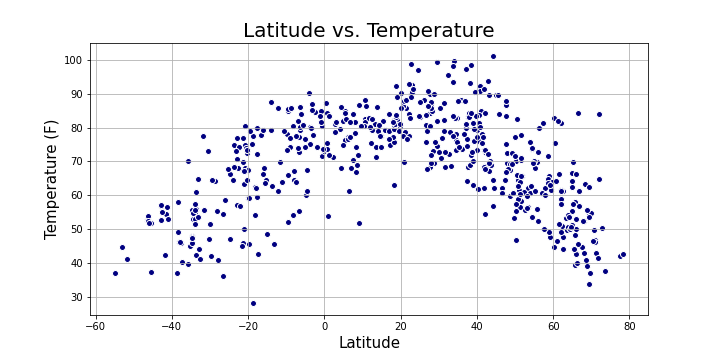

In [23]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Maximum_Temp'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Temperature",fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.grid()
plt.savefig("../output_data/Lat_vs_Temp_Scatter.png")
plt.show()


## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


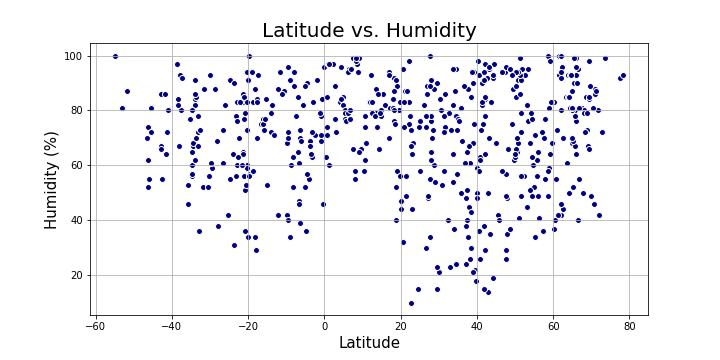

In [24]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Humidity'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Humidity", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.grid()
plt.savefig("../output_data/Lat_vs_Humidity_Scatter.png")
plt.show()


## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


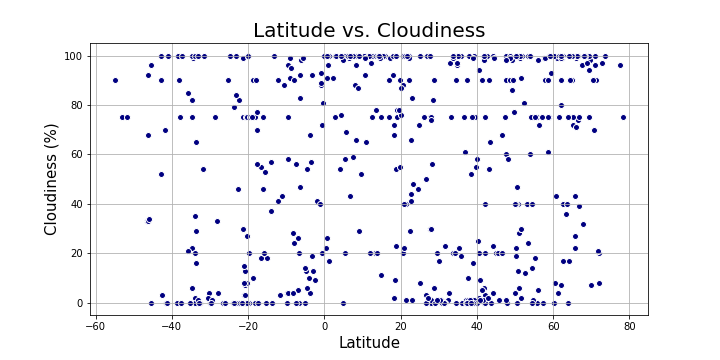

In [25]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Cloudiness'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Cloudiness", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.grid()
plt.savefig("../output_data/Lat_vs_Cloudiness_Scatter.png")
plt.show()


## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


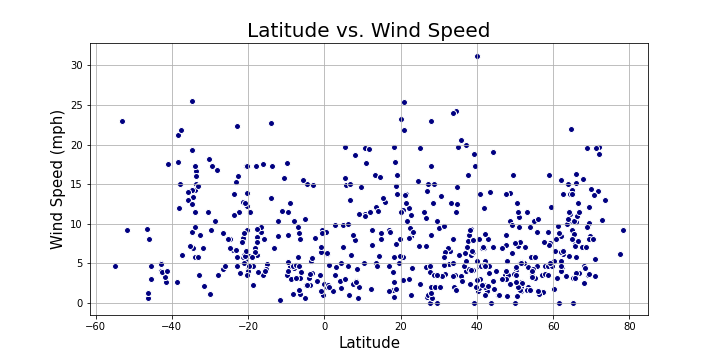

In [26]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Wind_Speed'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Wind Speed", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.grid()
plt.savefig("../output_data/Lat_vs_Wind_Speed_Scatter.png")
plt.show()

## Linear Regression

In [29]:
maskNorth = weatherDf['Latitude'] >= 0
northDf = weatherDf[maskNorth].reset_index()
northDf.describe()

,index,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,3.730000e+02
mean,313.941019,39.354282,8.894428,71.518579,70.715818,58.329759,7.703378,1.627436e+09
std,174.019007,20.061238,88.956657,14.120062,20.927414,39.528690,5.514922,8.812705e+01
min,2.000000,0.541200,-179.166700,33.800000,10.000000,0.000000,0.000000,1.627436e+09
25%,171.000000,22.678300,-73.414000,61.920000,58.000000,20.000000,3.440000,1.627436e+09
50%,316.000000,40.427200,15.640100,73.560000,76.000000,75.000000,6.440000,1.627436e+09
75%,468.000000,55.743500,81.482500,82.380000,87.000000,99.000000,10.940000,1.627436e+09
max,604.000000,78.218600,178.416700,101.320000,100.000000,100.000000,31.250000,1.627436e+09


In [30]:
maskSouth = weatherDf['Latitude'] < 0
southDf = weatherDf[maskSouth].reset_index()
southDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         175 non-null    int64  
 1   City          175 non-null    object 
 2   Latitude      175 non-null    float64
 3   Longitude     175 non-null    float64
 4   Maximum_Temp  175 non-null    float64
 5   Humidity      175 non-null    float64
 6   Cloudiness    175 non-null    float64
 7   Wind_Speed    175 non-null    float64
 8   Country       175 non-null    object 
 9   Date          175 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.8+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


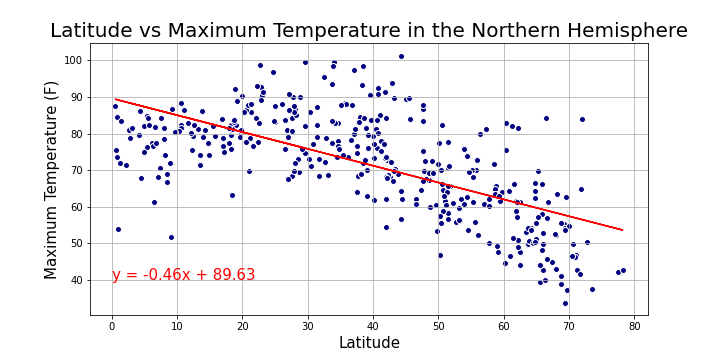

The r-squared is: 0.4273921756239857


In [39]:
x_values = northDf['Latitude']
y_values = northDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


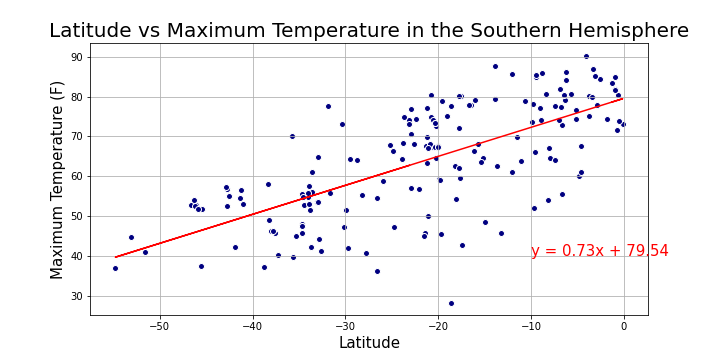

The r-squared is: 0.48738163533372253


In [38]:
x_values = southDf['Latitude']
y_values = southDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


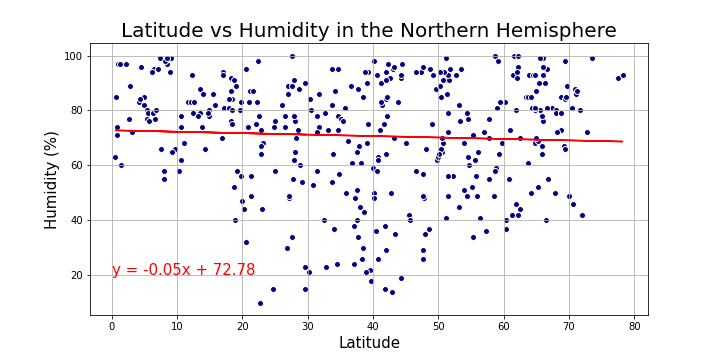

The r-squared is: 0.0025202399120149302


In [40]:
x_values = northDf['Latitude']
y_values = northDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


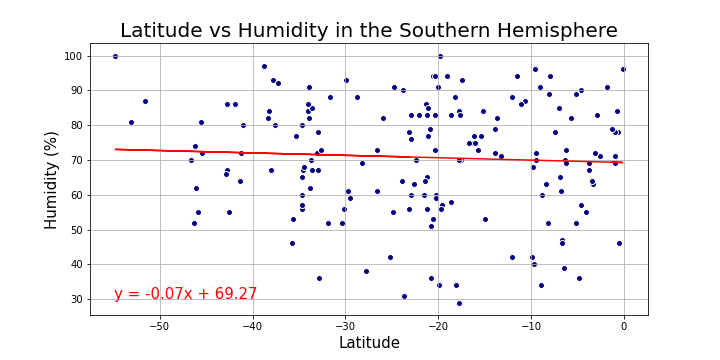

The r-squared is: 0.003113186103293727


In [41]:
x_values = southDf['Latitude']
y_values = southDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


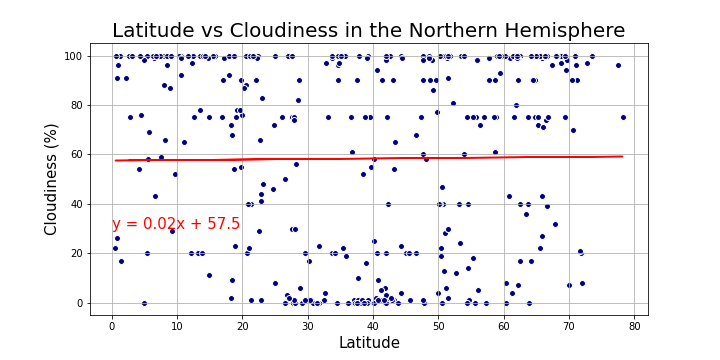

The r-squared is: 0.00011324566185433806


In [42]:
x_values = northDf['Latitude']
y_values = northDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


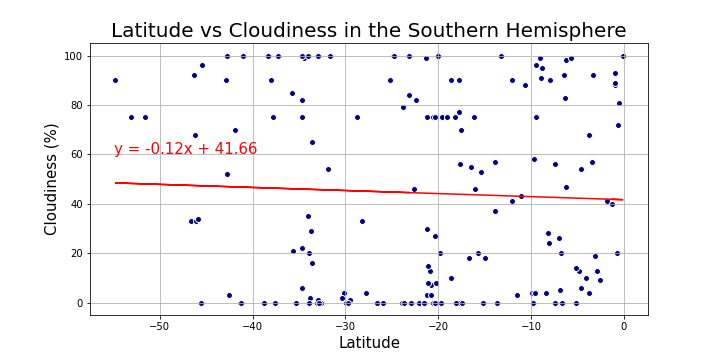

The r-squared is: 0.0017848772177766175


In [43]:
x_values = southDf['Latitude']
y_values = southDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


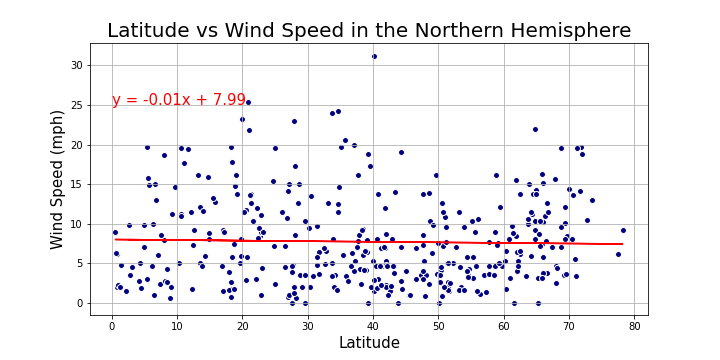

The r-squared is: 0.0006920092050009713


In [44]:
x_values = northDf['Latitude']
y_values = northDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


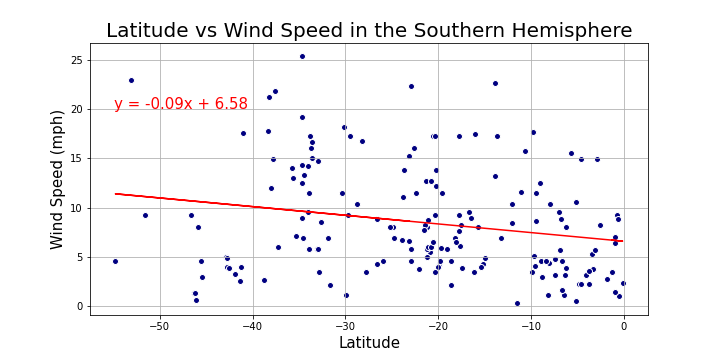

The r-squared is: 0.04501898815899195


In [45]:
x_values = southDf['Latitude']
y_values = southDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()